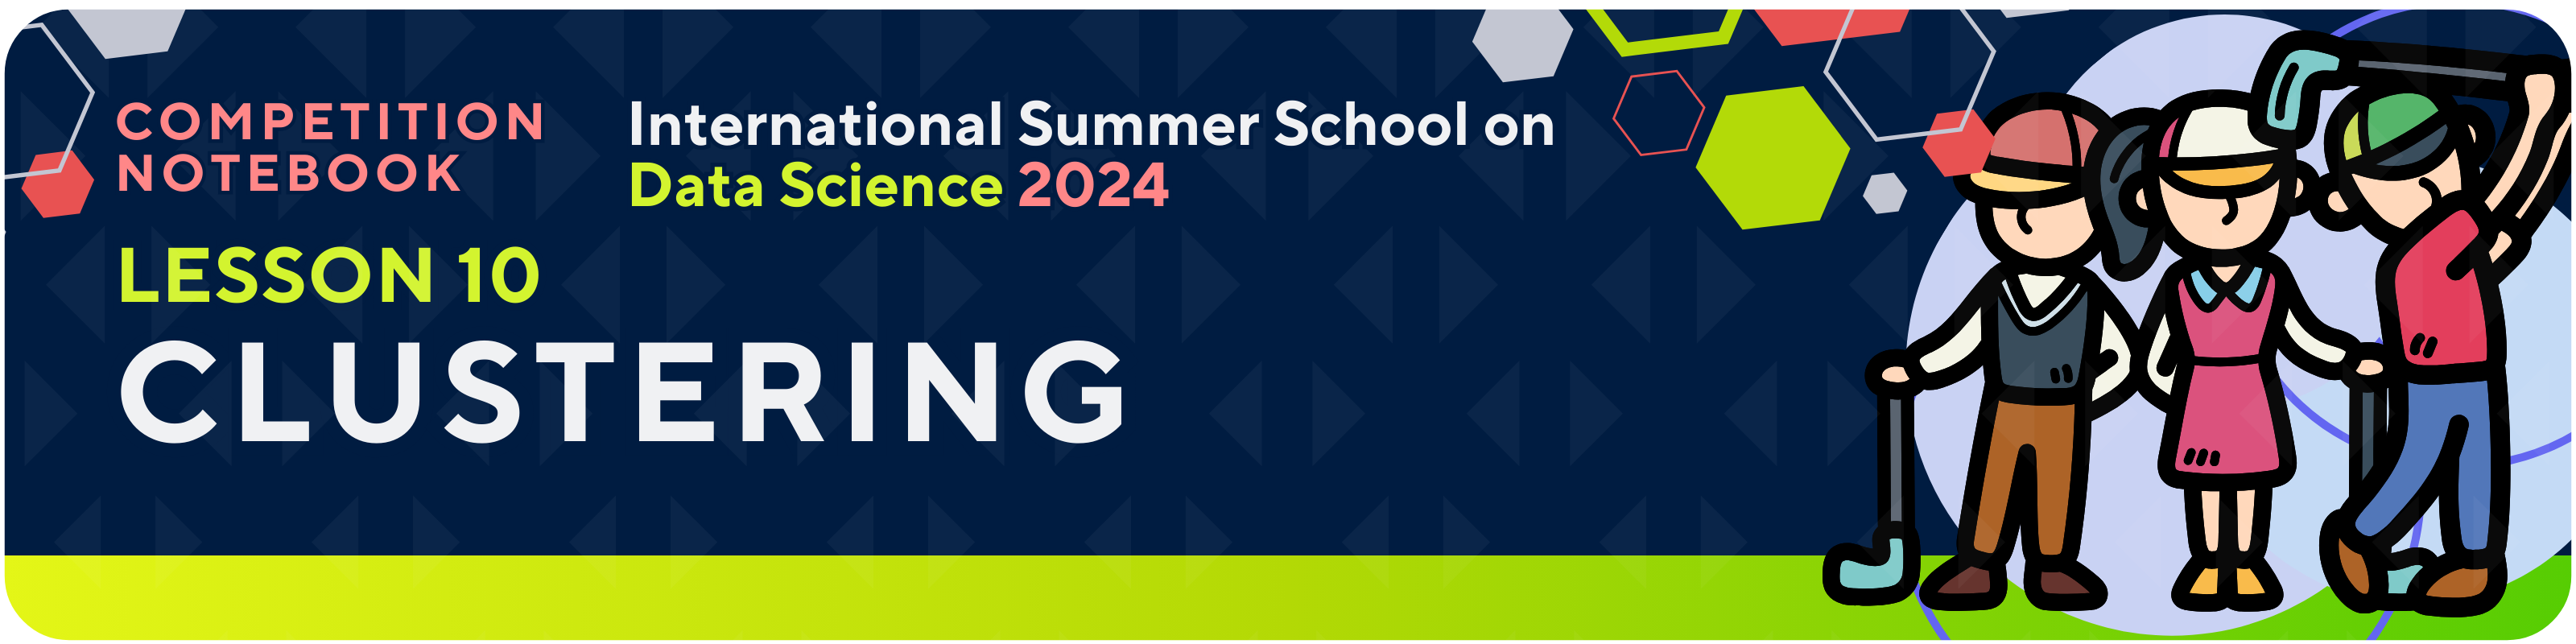


## **🎯      Goal**


Assign clusters to each of the golfers (based on their Membership ID), indicating their group (cluster) based on their golf stats.<br><br>


<img src="https://i.imgur.com/dDerXdY.png" width=1200 />



## **1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Import Libraries**


In [ ]:
!pip install umap-learn -q

In [ ]:
# BASIC LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# PREPROCESSING
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.pipeline       import Pipeline, make_pipeline
from sklearn.compose         import ColumnTransformer

# DIMENSIONALITY REDUCTION
from umap                    import UMAP

# HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV

# ANOMALY DETECTION
from sklearn.cluster         import KMeans
from sklearn.metrics         import make_scorer
from sklearn.metrics         import silhouette_score, silhouette_samples

## **2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load Training Dataset**



In [ ]:
# Load training dataset
train_url = "https://www.dropbox.com/scl/fi/trc40sel9ux3sy2v1wvti/train_clustering.csv?rlkey=w516y8ohuwb7upys3ozo13y7z&st=qeozuw97&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col=0)

print(df_train.shape)
df_train.head()

(835, 14)


,YearsOfExperience,HandicapIndex,AvgDrivingDistance,AveragePuttsPerRound,DrivingAccuracy,GreensInRegulation,TournamentWins,PreferredTemperature,PreferredHumidity,PreferredWindSpeed,RainTolerance,SunlightPreference,PreferredCloudCover,ExtremeTempComfort
MembershipID,,,,,,,,,,,,,,
NL82085,9.7,1.9,333.5,27.4,70.5,71.6,0,61.8,57,3.6,7.7,8.1,40.1,9.2
XR21273,22.5,18.6,187.9,32.7,54.6,70.4,0,69.6,48,1.1,4.2,5.1,58.2,4.4
QG67784,3.3,15.9,216.4,31.7,62.3,58.2,0,62.8,61,2.8,4.3,4.8,34.2,6.7
ZE82770,4.5,17.0,208.1,34.6,61.6,68.2,0,61.6,59,2.4,4.9,6.1,51.7,6.4
CL59181,4.2,1.3,344.9,25.0,68.6,67.7,0,61.4,29,3.3,9.8,7.3,34.3,8.9



## **3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Set Feature Matrix & Target Variable**



In [ ]:
# Set Feature Matrix
target_col = 'Cluster'
X = df_train

print(X)

              YearsOfExperience  HandicapIndex  AvgDrivingDistance  \
MembershipID                                                         
NL82085                     9.7            1.9               333.5   
XR21273                    22.5           18.6               187.9   
QG67784                     3.3           15.9               216.4   
ZE82770                     4.5           17.0               208.1   
CL59181                     4.2            1.3               344.9   
...                         ...            ...                 ...   
KQ71967                    26.8            1.0               297.7   
DN02233                     1.4           18.1               197.1   
MH82771                    16.3            4.7               262.7   
LI72149                     6.8           16.0               308.4   
UE15643                    17.1           10.4               325.7   

              AveragePuttsPerRound  DrivingAccuracy  GreensInRegulation  \
MembershipID  


## **4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Explore Data**


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, NL82085 to UE15643
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YearsOfExperience     835 non-null    float64
 1   HandicapIndex         835 non-null    float64
 2   AvgDrivingDistance    835 non-null    float64
 3   AveragePuttsPerRound  835 non-null    float64
 4   DrivingAccuracy       835 non-null    float64
 5   GreensInRegulation    835 non-null    float64
 6   TournamentWins        835 non-null    int64  
 7   PreferredTemperature  835 non-null    float64
 8   PreferredHumidity     835 non-null    int64  
 9   PreferredWindSpeed    835 non-null    float64
 10  RainTolerance         835 non-null    float64
 11  SunlightPreference    835 non-null    float64
 12  PreferredCloudCover   835 non-null    float64
 13  ExtremeTempComfort    835 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 97.9+ KB
None



## **5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Perform Preprocessing**


In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

### Visualize Preprocessed Data

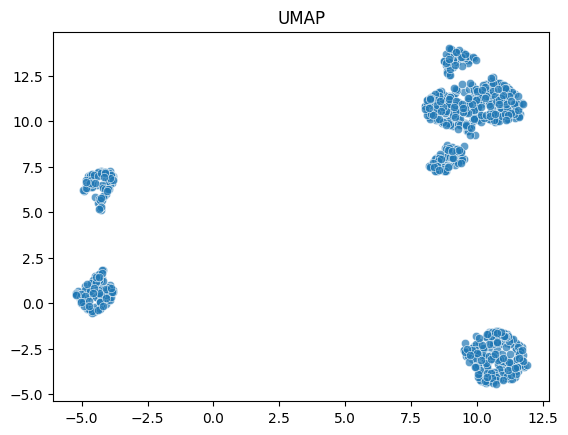

In [ ]:
# Reduce Dimension
dim_reducer = UMAP()
X_transformed = dim_reducer.fit_transform(X_processed)

# Visualize
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            alpha=0.7, edgecolor='w', lw=0.5)
plt.title('UMAP')
plt.show()


## **6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Training Pipeline**



In [ ]:
from sklearn.cluster import AgglomerativeClustering, Birch, SpectralClustering
# MAKE A TRAINING PIPELINE
training_pipeline = Pipeline([
    ('clusterer', SpectralClustering())
])

training_pipeline

Pipeline(steps=[('clusterer', SpectralClustering())])


## **7**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Tune Hyperparameters**



In [ ]:
from sklearn.metrics import calinski_harabasz_score
# Define parameter distribution
param_dist = {
    'clusterer__n_clusters': [7, 10],  # Range depends on expected number of clusters
    'clusterer__eigen_solver': ['arpack', 'lobpcg', None],  # Solver to use
    'clusterer__n_init': [10, 20, 30],  # Number of different centroid seeds to try
    'clusterer__gamma': np.logspace(-2, 1, 4),  # Scale for RBF kernel
    'clusterer__affinity': ['nearest_neighbors', 'rbf']  # Type of affinity to use
}

# # Define scoring function
# def silhouette_scorer(estimator, X):
#     labels = estimator.fit_predict(X)
#     score = silhouette_score(X, labels, metric='euclidean')
#     return score

def calinski_harabasz_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    # We need to handle the case where all data points are in one cluster or outliers are marked.
    if len(set(labels)) < 2 or (len(set(labels)) == 1 and -1 in labels):
        return 0  # Return a low score as the score cannot be calculated for less than 2 clusters.
    score = calinski_harabasz_score(X, labels)
    return score

# Perform Random Search
random_search = RandomizedSearchCV(estimator=training_pipeline,
                                   param_distributions=param_dist,
                                   scoring=calinski_harabasz_scorer,
                                   n_iter =15,
                                   cv=5)
random_search.fit(X_processed)

# Print best parameter and score
print("Best Parameters:")
print(pd.Series(random_search.best_params_))
print("\nBest Silhouette Score:")
print(f"{random_search.best_score_:.4}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Best Parameters:
clusterer__n_init              20
clusterer__n_clusters           7
clusterer__gamma             0.01
clusterer__eigen_solver    lobpcg
clusterer__affinity           rbf
dtype: object

Best Silhouette Score:
27.35



## **8**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Fit the Model**



In [ ]:
# SAVE & FIT BEST MODEL
best_model = random_search.best_estimator_
best_model.fit(X_processed)

Pipeline(steps=[('clusterer',
                 SpectralClustering(eigen_solver='lobpcg', gamma=0.01,
                                    n_clusters=7, n_init=20))])


## **9**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Prediction**



In [ ]:
# Predict the Cluster
# y_pred = best_model.predict(X_processed)
y_pred = best_model.named_steps['clusterer'].labels_
# Print the prediction
# pd.Series(y_pred)

### Visualize the Prediction

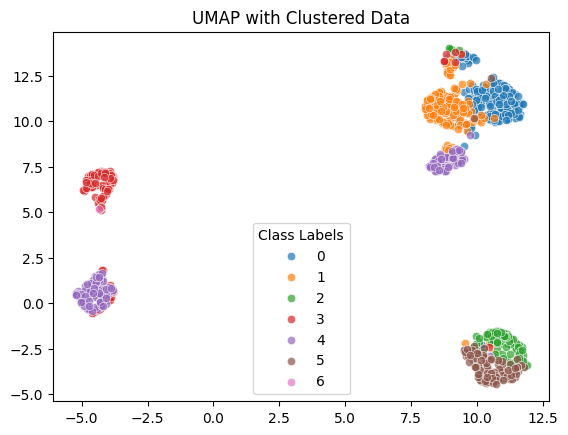

In [ ]:
# Visualize
for i in np.unique(y_pred):
    plt.scatter(X_transformed[y_pred == i, 0], X_transformed[y_pred == i, 1],
                label=i, alpha=0.7, edgecolor='w', lw=0.5)
plt.title('UMAP with Clustered Data')
plt.legend(title='Class Labels')
plt.show()


## **10**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Create Submission File**


In [ ]:
# Make DataFrame for Submission
submission = pd.DataFrame(y_pred, index=X.index, columns=['Cluster'])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Download File**

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
---

## ──────────────────────


## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Post-clustering Analysis**



### Scatterplot, colored by clusters

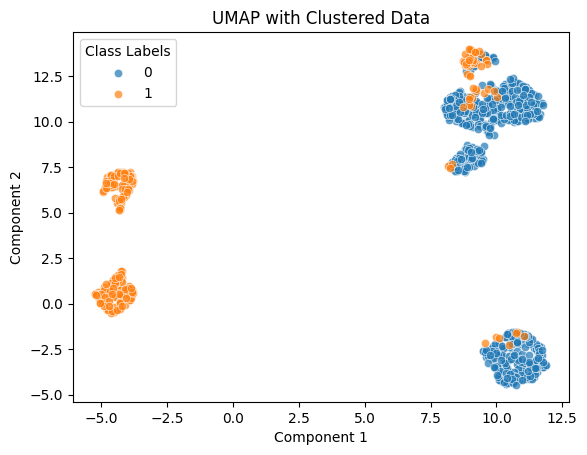

In [ ]:
# Visualize
for i in np.unique(y_pred):
    plt.scatter(X_transformed[y_pred == i, 0], X_transformed[y_pred == i, 1],
                label=i, alpha=0.7, edgecolor='w', lw=0.5)
plt.title('UMAP with Clustered Data')
plt.legend(title='Class Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

### Silhouette Plot

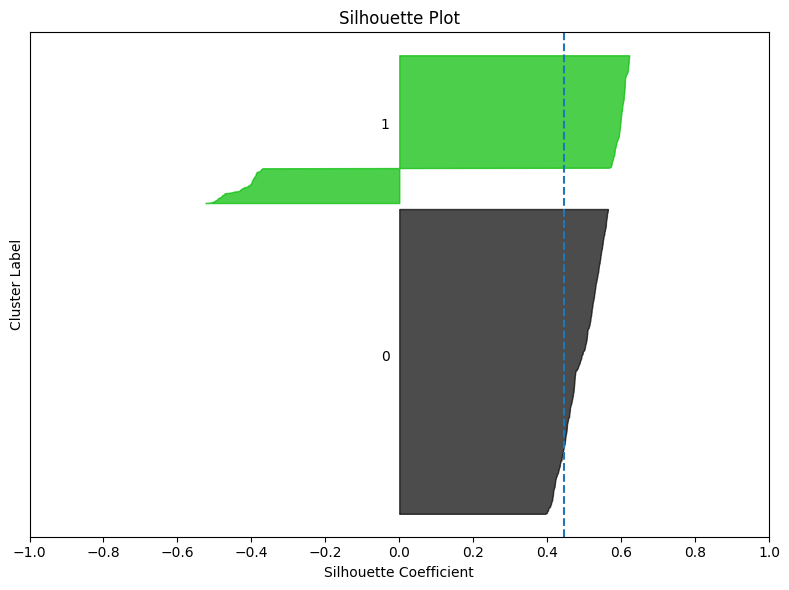

In [ ]:
# Calculate the silhouette scores for each data point
silhouette_coefficients = silhouette_samples(X_transformed, y_pred)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the silhouette plot
y_lower = 10
for i in range(len(np.unique(y_pred))):
    ith_cluster_silhouette_values = silhouette_coefficients[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(y_pred)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster Label")

ax.axvline(x=silhouette_score(X_transformed, y_pred), linestyle="--")
ax.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xlim([-1, 1])
ax.set_yticks([])

plt.tight_layout()
plt.show()

### Silhoette Scores Histogram

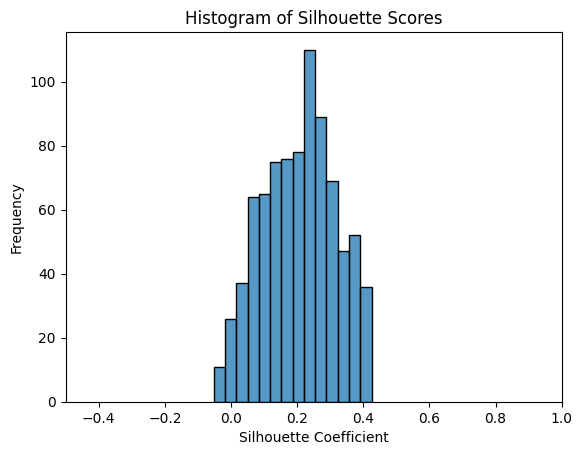

In [ ]:
# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_processed, y_pred)

# Create a histogram of the silhouette scores
sns.histplot(silhouette_vals, kde=False)
plt.xlim(-0.5,1)
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')

plt.show()


### Cluster profile plot

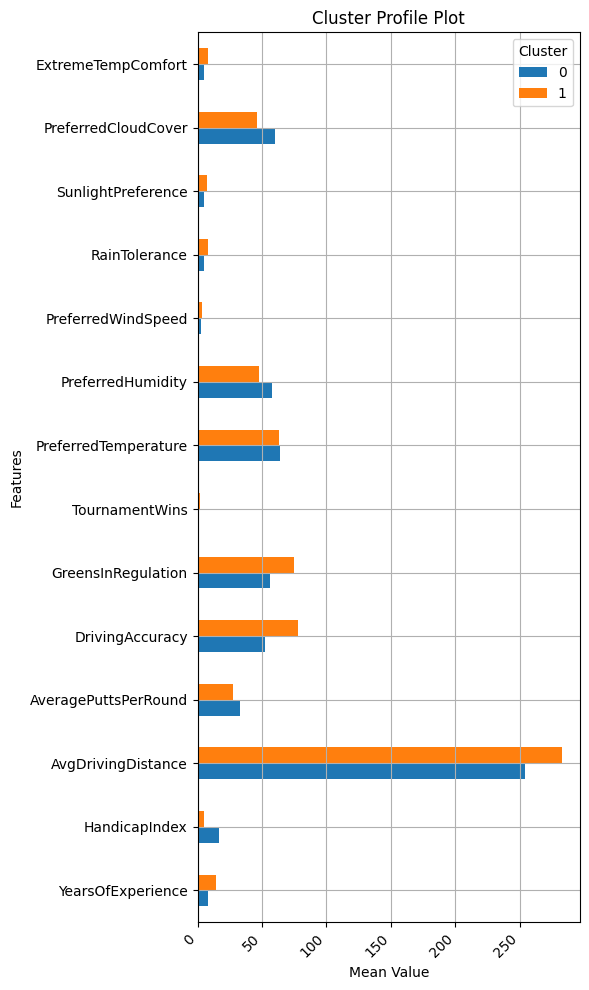

In [ ]:
# Add the cluster labels to the DataFrame
X_clustered = X.copy()
X_clustered['Cluster'] = y_pred

# Calculate the mean values of each feature for each cluster
cluster_means = X_clustered.groupby('Cluster').mean()

# Transpose the cluster means DataFrame
cluster_means_transposed = cluster_means.transpose()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 10))

# Plot the cluster profile plot
cluster_means_transposed.plot(kind='barh', ax=ax, legend=True)

# Set the title and labels
ax.set_title("Cluster Profile Plot")
ax.set_xlabel("Mean Value")
ax.set_ylabel("Features")

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines
ax.grid(True)

plt.tight_layout()
plt.show()

### Features Histogram for each Cluster

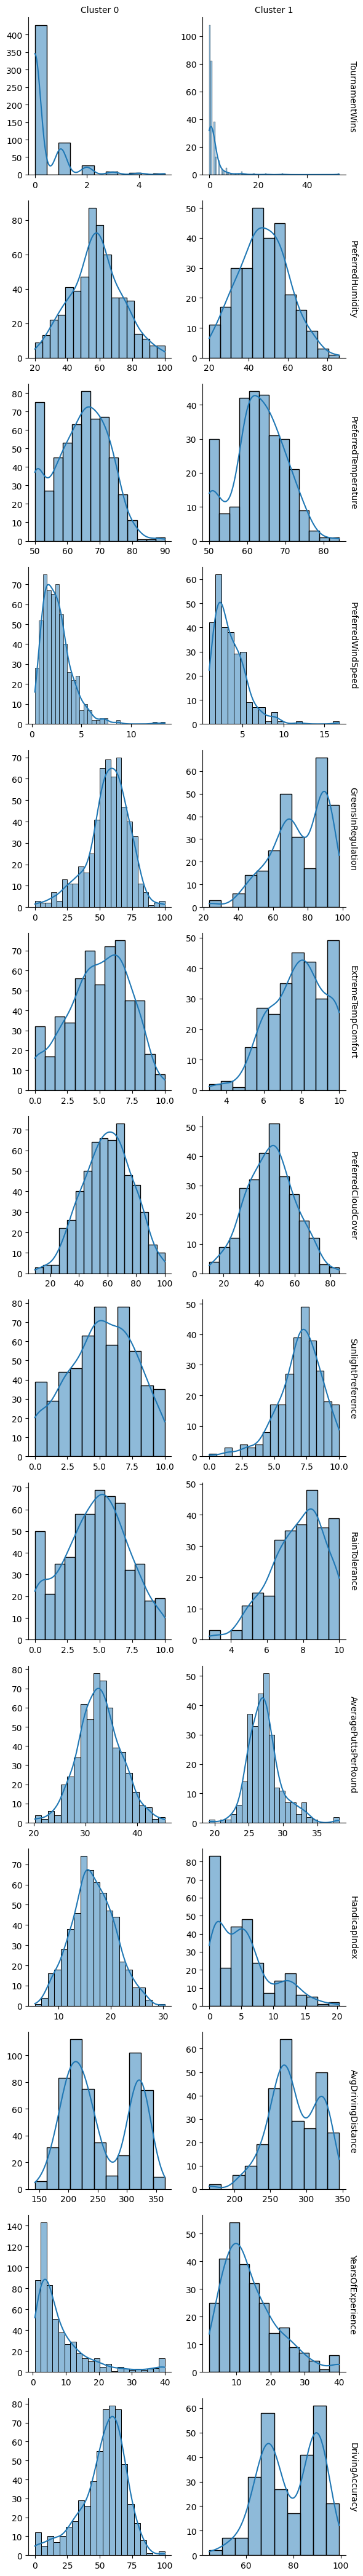

In [ ]:
# Convert cluster labels to string
X['Cluster'] = y_pred.astype(str)

# Melt the DataFrame to long format for FacetGrid
X_melted = X.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

# Create and map the FacetGrid
g = sns.FacetGrid(X_melted.sort_values(by='Cluster'), row='Feature', col='Cluster',
                  sharex=False, sharey=False, margin_titles=True)
g.map(sns.histplot, 'Value', kde=True)
g.set_axis_labels("", "")
g.set_titles(row_template="{row_name}", col_template="Cluster {col_name}")

# Adjust layout
plt.tight_layout()
plt.show()

### Features Statistics for each Cluster

In [ ]:
# Add the cluster labels to your original DataFrame
X_clustered = X.copy()
X_clustered['Cluster'] = y_pred

# Group by the cluster label and calculate mean and count for each cluster
cluster_description = X_clustered.groupby('Cluster').agg(['mean','std']).round(1)

cluster_description

YearsOfExperience      HandicapIndex      AvgDrivingDistance        \
                     mean  std          mean  std               mean   std   
Cluster                                                                      
0                     8.5  8.6          16.6  4.1              254.1  55.9   
1                    14.0  8.1           5.3  4.4              282.6  34.3   

        AveragePuttsPerRound      DrivingAccuracy        ...  \
                        mean  std            mean   std  ...   
Cluster                                                  ...   
0                       32.7  4.2            52.5  17.7  ...   
1                       27.3  2.5            78.3  12.2  ...   

        PreferredWindSpeed      RainTolerance      SunlightPreference       \
                      mean  std          mean  std               mean  std   
Cluster                                                                      
0                      2.6  1.5           4.7  2.5                5.2  2.6   
1                      3.5  2.0           7.7  1.5                7.0  1.7   

        PreferredCloudCover       ExtremeTempComfort       
                       mean   std               mean  std  
Cluster                                                    
0                      60.1  17.3                4.9  2.3  
1                      46.4  13.6                7.8  1.5  

[2 rows x 28 columns]